## Bank Marketing Predictions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\Board infinity\assignment\ML Project1_BMP\bank-marketing.csv')
df.head()


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [3]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

###  Ans. the As we see minimum and upto 3rd quantile values are -1 that is 75% values are null
### 2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [4]:
df1=df[df['pdays']!=-1]
df1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## Ans. There is a lot of difference in mean and median of both the cases i.e mean [40.19,224.5] and median [-1,194]

## 3. Plot a horizontal bar graph with the median values of balance for each education level value.Which group has the highest median?

In [5]:
ax = df.groupby(['education'])['balance'].median()
ax

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

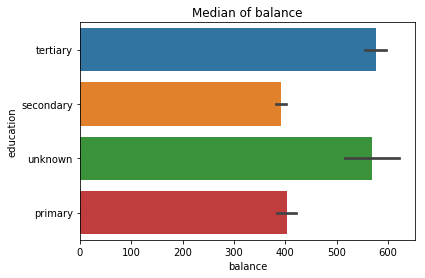

In [6]:
ax = sns.barplot(x='balance',y='education',data=df, estimator=np.median).set_title('Median of balance')

### Ans. Tertiary has the highest median

### 4. Make a box plot for pdays. Do you see any outliers?


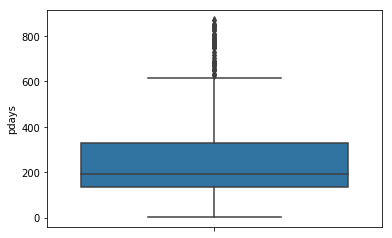

In [7]:
ax= sns.boxplot(y='pdays',data=df1)

### Ans. There are outliers.

## Exploratory Data Analysis


In [8]:
df1.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

### 5.Convert the response variable to a convenient form


In [9]:
#Response has categorical values. Converting them 0 & 1
df1.replace({'response': {"yes": 1,'no':0}}, inplace=True)

In [10]:

df.replace({'response': {"yes": 1,'no':0}}, inplace=True)

In [11]:
### identifyind categorical and numerical columns
cols = df.columns
num_cols= df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

###  Make suitable plots for associations with numerical features and categorical features’

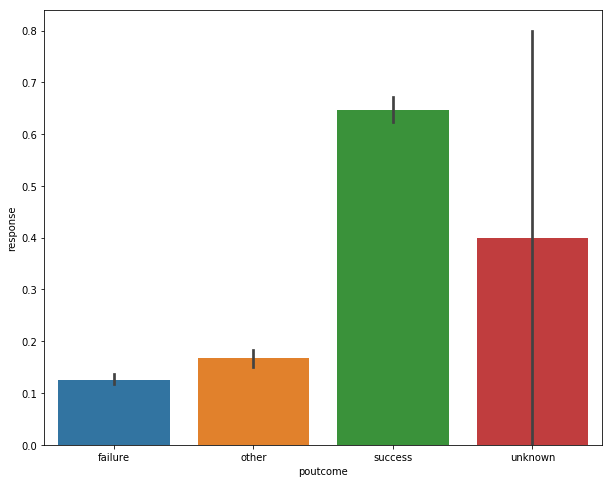

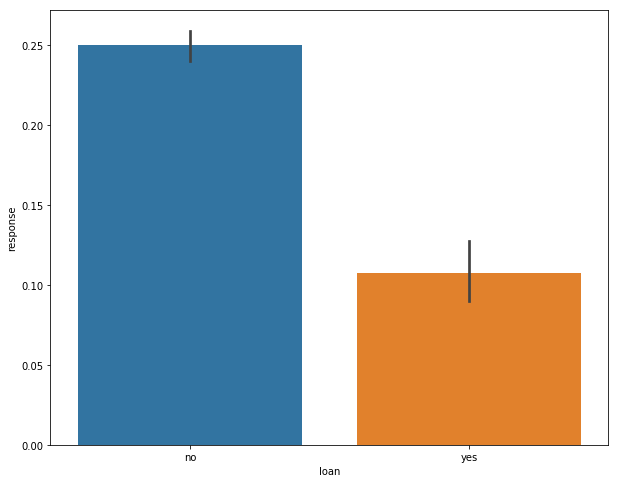

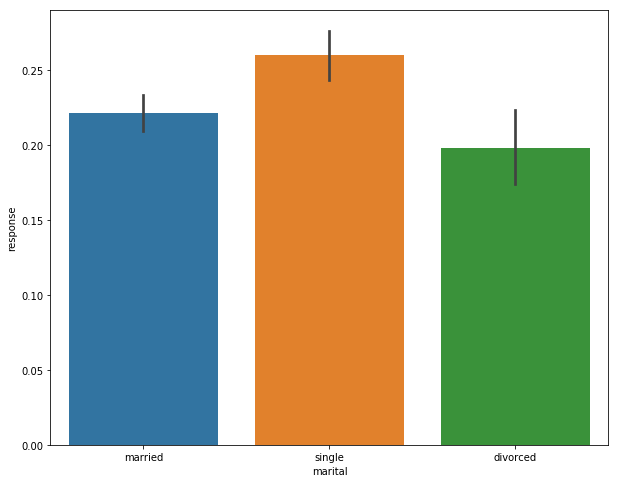

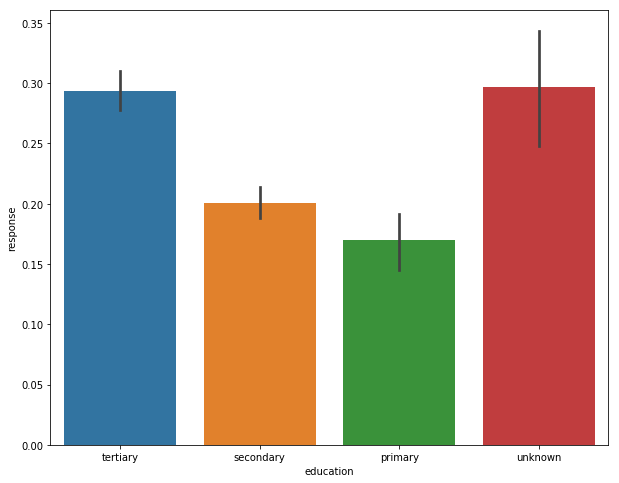

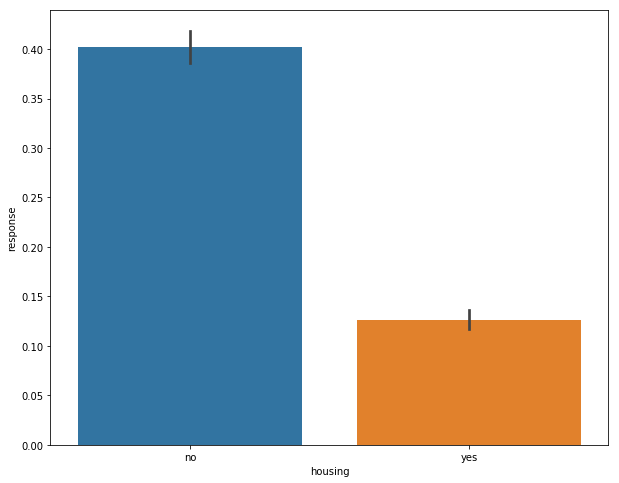

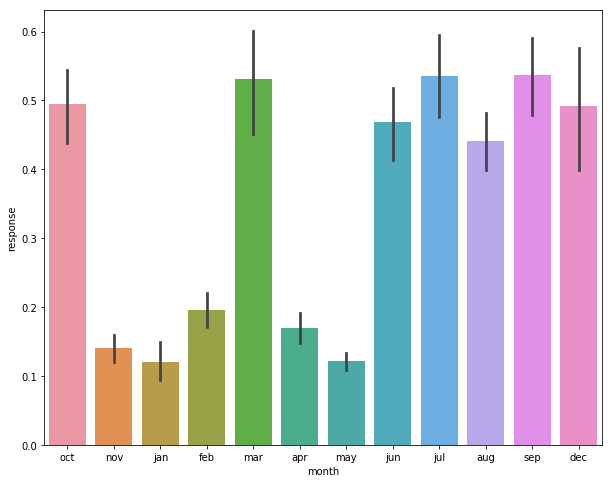

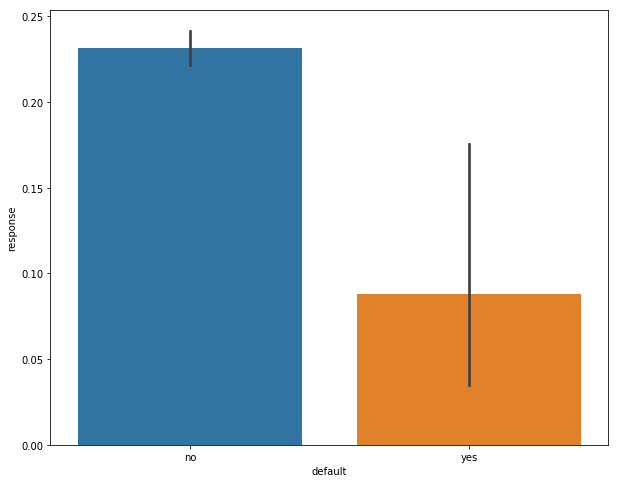

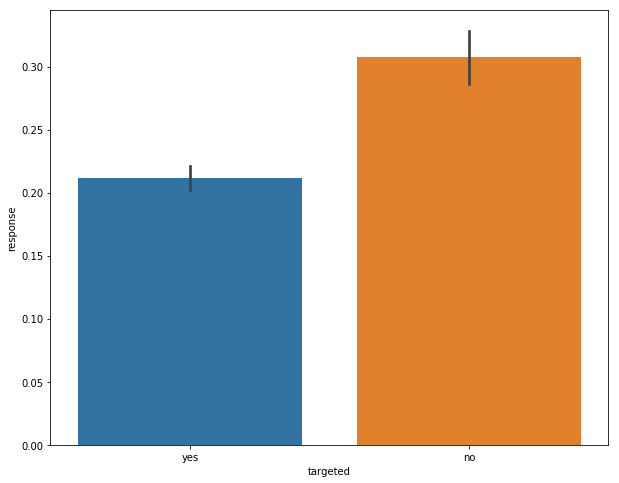

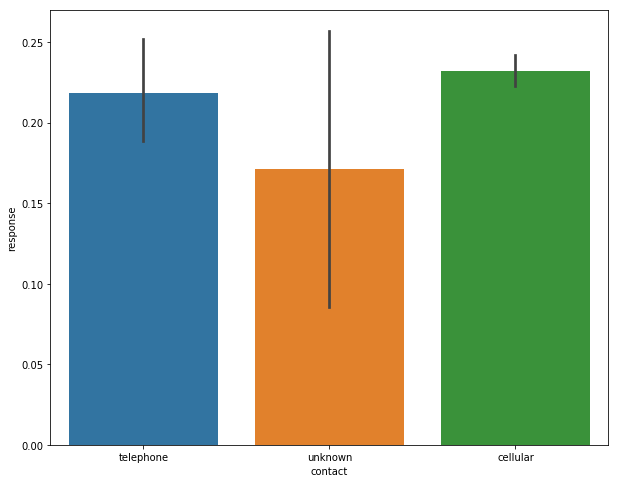

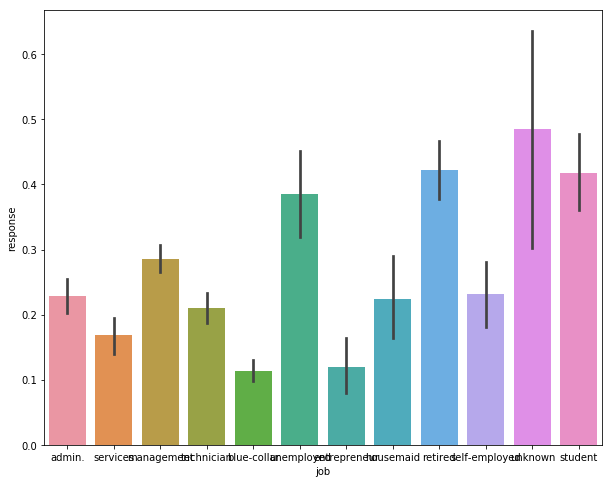

In [12]:
for i in df[cat_cols]:
     plt.figure(figsize=(10,8))
     ax = sns.barplot(df1[i],df.response)
     plt.show()


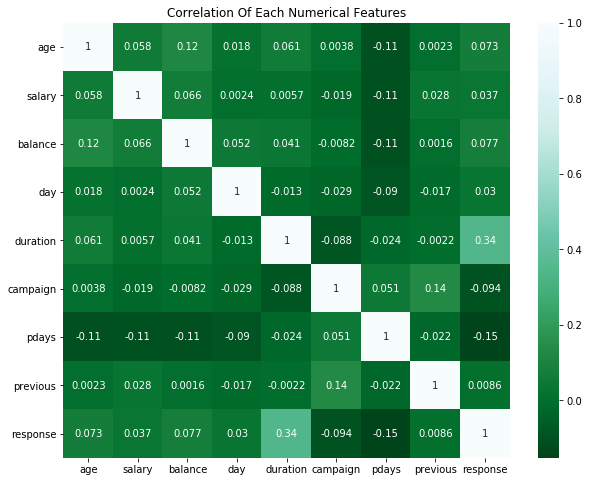

In [13]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df1.corr(),annot=True,cmap='BuGn_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()



### No, from the heatmap we can say that pdays and poutcome are not associated with response.

<Figure size 720x504 with 0 Axes>

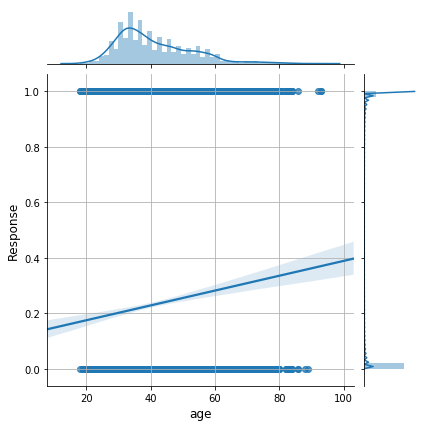

<Figure size 720x504 with 0 Axes>

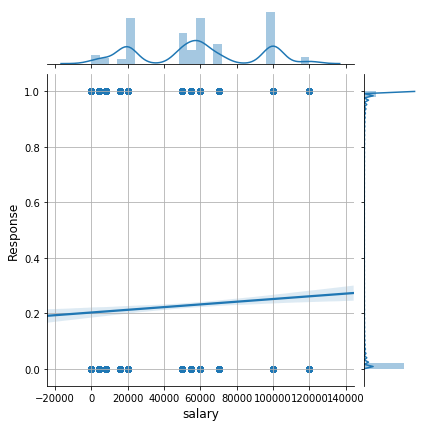

<Figure size 720x504 with 0 Axes>

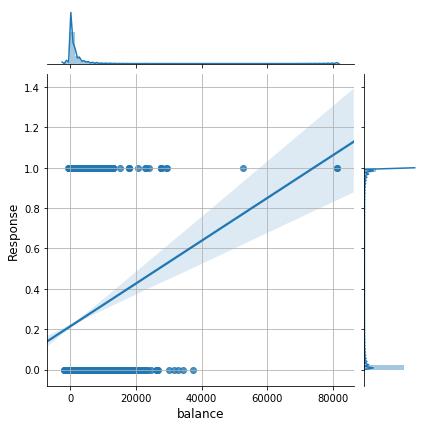

<Figure size 720x504 with 0 Axes>

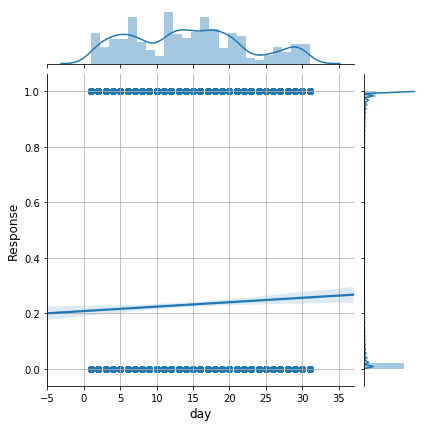

<Figure size 720x504 with 0 Axes>

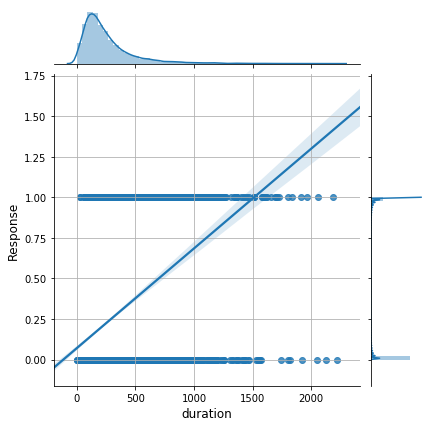

<Figure size 720x504 with 0 Axes>

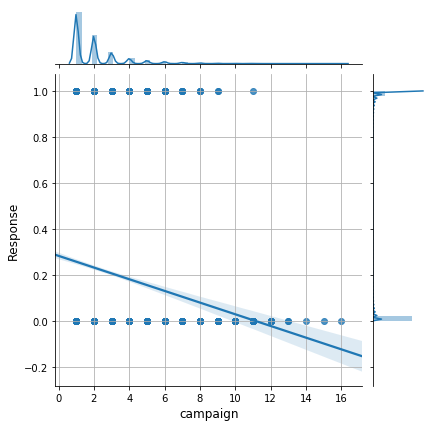

<Figure size 720x504 with 0 Axes>

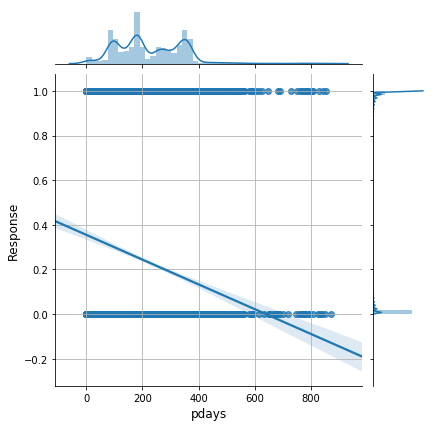

<Figure size 720x504 with 0 Axes>

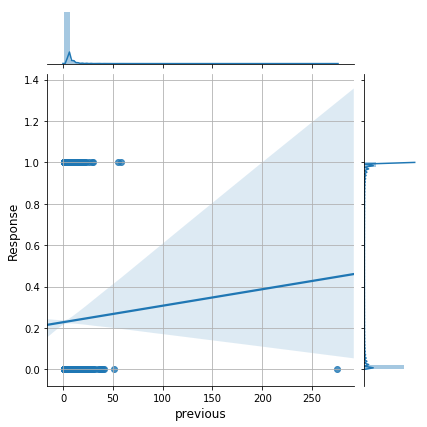

In [14]:
for col in num_cols[:-1]: #Association of response variable with Numerical features
    plt.figure(figsize=(10,7))
    ax = sns.jointplot(x = df1[col],y = df1["response"],kind='reg')
    plt.xlabel(col,fontsize = 12)
    plt.ylabel("Response",fontsize = 12)
    plt.grid()
    plt.show()

### Making necessary transformations for categorical and numerical variables & Label encoding of categorical variables


In [15]:
from sklearn.preprocessing import LabelEncoder
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [16]:
df2.head()

,poutcome,loan,marital,education,housing,month,default,targeted,contact,job
24060,0,0,1,2,0,10,0,1,1,0
24062,1,1,2,1,1,10,0,1,1,0
24064,0,0,1,1,1,10,0,1,1,7
24072,1,0,1,2,1,10,0,1,1,4
24077,0,0,1,2,1,10,0,1,1,4


In [17]:
df3=df2.join(df1[num_cols])

In [18]:
df3.head()

,poutcome,loan,marital,education,housing,month,default,targeted,contact,job,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,0,1,2,0,10,0,1,1,0,33,50000,882,21,39,1,151,3,0
24062,1,1,2,1,1,10,0,1,1,0,42,50000,-247,21,519,1,166,1,1
24064,0,0,1,1,1,10,0,1,1,7,33,70000,3444,21,144,1,91,4,1
24072,1,0,1,2,1,10,0,1,1,4,36,100000,2415,22,73,1,86,4,0
24077,0,0,1,2,1,10,0,1,1,4,36,100000,0,23,140,1,143,3,1


In [19]:
df3.corr()

,poutcome,loan,marital,education,housing,month,default,targeted,contact,job,age,salary,balance,day,duration,campaign,pdays,previous,response
poutcome,1.000000,-0.103154,0.045015,0.082852,-0.284439,-0.019188,-0.025566,-0.071356,0.024590,0.066642,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519
loan,-0.103154,1.000000,-0.055435,-0.047718,0.109815,0.000524,0.052261,0.070420,-0.020904,-0.033500,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
marital,0.045015,-0.055435,1.000000,0.121688,-0.056963,-0.024130,-0.005632,-0.255247,-0.031866,0.072746,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.082852,-0.047718,0.121688,1.000000,-0.129804,-0.010829,-0.013682,-0.632513,-0.048456,0.159280,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
housing,-0.284439,0.109815,-0.056963,-0.129804,1.000000,0.014452,0.022644,0.087470,-0.069869,-0.132378,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
month,-0.019188,0.000524,-0.024130,-0.010829,0.014452,1.000000,0.020123,0.010187,0.047045,-0.002498,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
default,-0.025566,0.052261,-0.005632,-0.013682,0.022644,0.020123,1.000000,0.019593,-0.019834,-0.021012,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
targeted,-0.071356,0.070420,-0.255247,-0.632513,0.087470,0.010187,0.019593,1.000000,0.020464,-0.091197,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
contact,0.024590,-0.020904,-0.031866,-0.048456,-0.069869,0.047045,-0.019834,0.020464,1.000000,-0.006279,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
job,0.066642,-0.033500,0.072746,0.159280,-0.132378,-0.002498,-0.021012,-0.091197,-0.006279,1.000000,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239


### Make a predictive model using logistic regression Predictive model 1: Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [21]:
X = df3.drop('response',axis=1)
y = df3['response']

In [22]:
# train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [23]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [24]:
print('Report:\n',classification_report(y_test, y_pred))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1915
           1       0.58      0.18      0.27       563

   micro avg       0.78      0.78      0.78      2478
   macro avg       0.69      0.57      0.57      2478
weighted avg       0.75      0.78      0.74      2478

confusion Matrix:
 [[1841  462]
 [  74  101]]
cross validation: [0.78510896 0.73970944 0.77952756 0.77407632 0.75408843]


In [25]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     410.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:46:55   Log-Likelihood:                -3019.6
No. Observations:                8257   AIC:                             6075.
Df Residuals:                    8239   BIC:                             6202.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
poutcome       0.1764      0.005     33.992      0.

### Use RFE to select top n features

In [26]:
### Using Rfe
from sklearn.feature_selection import RFE
rfe = RFE(lr, 18)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=18, step=1, verbose=0)

In [27]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['poutcome', 'loan', 'marital', 'education', 'housing', 'month',
       'default', 'targeted', 'contact', 'job', 'age', 'salary', 'balance',
       'day', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')


In [28]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",accuracy_score(y_pred2,y_test))

### What is the precision, recall, accuracy of your model? 

### Estimate model performance using k fold cross validation

In [29]:
logReggResult()

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1915
           1       0.58      0.18      0.27       563

   micro avg       0.78      0.78      0.78      2478
   macro avg       0.69      0.57      0.57      2478
weighted avg       0.75      0.78      0.74      2478

AUC score: 0.570376897356107
confusion Matrix:
 [[1841  462]
 [  74  101]]
kfold cross validation:
 [0.78510896 0.73970944 0.77952756 0.77407632 0.75408843]
Acurracy :::> 0.7836965294592413


In [30]:
## Feature Importance
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['poutcome', 'housing', 'month', 'age', 'day', 'campaign', 'pdays'], dtype='object')

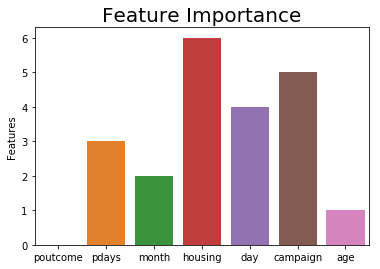

In [31]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
ax = sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

###  Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
X = df3.drop('response',axis=1)
y = df3['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)


In [34]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [35]:
y_pred1 = rfc.predict(X_test)

In [36]:
from sklearn.tree import export_graphviz
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'response',
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [37]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",accuracy_score(y_pred1,y_test))

In [38]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1915
           1       0.78      0.42      0.55       563

   micro avg       0.84      0.84      0.84      2478
   macro avg       0.81      0.69      0.73      2478
weighted avg       0.83      0.84      0.82      2478

confusion Matrix:
 [[1846  324]
 [  69  239]]
cross validation: [0.77542373 0.78268765 0.84857662 0.85523925 0.56390067]
AUC score: 0.570376897356107
Acurracy :::> 0.8414043583535109


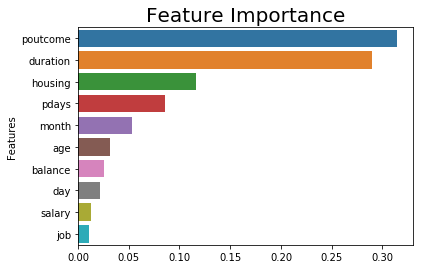

In [39]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
ax = sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

### Comparison Between Random Forest and Logistic Regression

In [40]:
print (start + "############### Random Forest Result: ###############\n")
RF()
print(start +'\n\n############# Logistic Regression Result: ############\n')
logReggResult()

############### Random Forest Result: ###############

Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1915
           1       0.78      0.42      0.55       563

   micro avg       0.84      0.84      0.84      2478
   macro avg       0.81      0.69      0.73      2478
weighted avg       0.83      0.84      0.82      2478

confusion Matrix:
 [[1846  324]
 [  69  239]]
cross validation: [0.77542373 0.78268765 0.84857662 0.85523925 0.56390067]
AUC score: 0.570376897356107
Acurracy :::> 0.8414043583535109


############# Logistic Regression Result: ############

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1915
           1       0.58      0.18      0.27       563

   micro avg       0.78      0.78      0.78      2478
   macro avg       0.69      0.57      0.57      2478
weighted avg       0.75      0.78      0.74      2478

AUC score: 0.570376897356107
con

### We see that the Random Forest has Perfomed good in comparision to Logistic Regression.
### Random Forest has Better F1 score, AUC, Confusion Matrix, kfold Cross val and accuracy in compare to Logistic Regression.
### The Main Features for the both Models/ Algorithm Differs as Random Forest and Logistic Regression Works on different Principal